In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('auto-mpg.csv', header=0)
df

,mpg,cylinders,displacement,hoursepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
df = df.drop(['hoursepower','origin','car_name'], axis=1, inplace =False)
df[:2]

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70


In [5]:
df.shape

(398, 6)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
y = df['mpg']
X = df.drop(['mpg'], axis=1, inplace=False)  # mpg는 column이다 and 원본은 건들지 않음
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
lr = LinearRegression().fit(X_train, y_train)  # fit - 훈련시킨다

In [11]:
y_answer = lr.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_answer)
rmse = np.sqrt(mse)

In [13]:
np.round(lr.coef_,2) # 계수를 소수 둘째자리까지, 5가지 학습해서 5개 나옴

array([-0.07,  0.01, -0.01,  0.2 ,  0.75])

In [14]:
X_train[:2]

,cylinders,displacement,weight,acceleration,model_year
254,6,200.0,2965,15.8,78
246,4,78.0,1985,19.4,78


In [15]:
np.round(lr.intercept_,2)

-17.09

In [16]:
import seaborn as sns

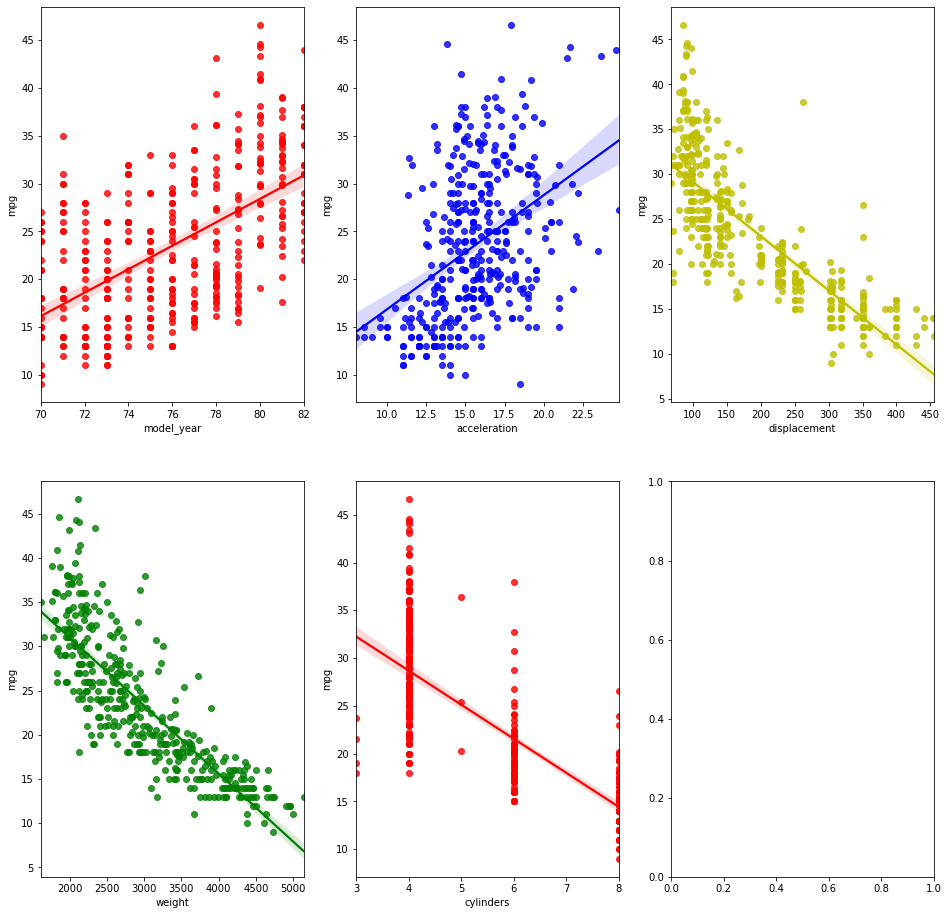

In [25]:
fig, axes = plt.subplots(2,3, figsize=(16,16))
x_features = ['model_year','acceleration','displacement','weight','cylinders']
plot_color = ['r','b','y','g','r']
for i, feature in enumerate(x_features):
    row= int(i/3)
    col=i%3
    sns.regplot(x= feature, y='mpg', data=df, ax=axes[row][col], color=plot_color[i])

In [26]:
# 피어슨 상관계수
df.corr(method='pearson')

,mpg,cylinders,displacement,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000


In [27]:
pd.__version__

'1.2.4'

In [1]:
!pip install pandas == 0.24.2

ERROR: Invalid requirement: '=='


In [3]:
# 비지도학습
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # y_train은 사용하지 않음, X만 사용

MinMaxScaler()

In [5]:
X_train_s = scaler.transform(X_train)

In [6]:
print(X_train.shape, X_train_s.shape)

(426, 30) (426, 30)


In [7]:
print(X_train.min(axis=0), X_train_s.min(axis=0))

[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [8]:
print(X_train.max(axis=0), X_train_s.max(axis=0)) # 30개의 항목이 전부 0과 1 사이로 같은 비율로 바뀜

[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [9]:
X_test_s = scaler.transform(X_test)

In [10]:
print(X_test.shape, X_test_s.shape)

(143, 30) (143, 30)


In [12]:
print(X_test.min(axis=0), X_test_s.min(axis=0))
# 0에 가깝지만 0은 아님

[7.691e+00 1.038e+01 4.834e+01 1.704e+02 6.828e-02 3.116e-02 0.000e+00
 0.000e+00 1.365e-01 4.996e-02 1.115e-01 3.871e-01 8.484e-01 7.228e+00
 2.866e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 1.087e-03 8.678e+00
 1.420e+01 5.449e+01 2.236e+02 8.774e-02 5.131e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02] [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]


In [13]:
print(X_test.max(axis=0), X_test_s.max(axis=0))
# 1에 가깝지만 1은 아님 

[2.722e+01 3.381e+01 1.821e+02 2.250e+03 1.425e-01 3.454e-01 3.754e-01
 1.878e-01 2.906e-01 9.744e-02 1.292e+00 2.612e+00 1.012e+01 1.587e+02
 1.604e-02 1.006e-01 3.038e-01 3.322e-02 7.895e-02 1.220e-02 3.312e+01
 4.178e+01 2.208e+02 3.216e+03 2.098e-01 1.058e+00 1.252e+00 2.688e-01
 6.638e-01 2.075e-01] [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


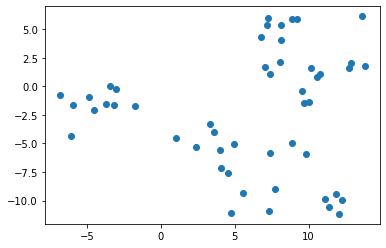

In [18]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2) # _:어짜피 쓰지 않을거니까 y는 받아오지 않겠다
plt.scatter(X[:,0],X[:,1])
plt.show()

In [19]:
X_train, X_test = train_test_split(X, random_state=5, test_size =0.1)

In [20]:
X_train.shape

(45, 2)

In [21]:
# 50개 중 0.1인 5개만 test로
X_test.shape

(5, 2)

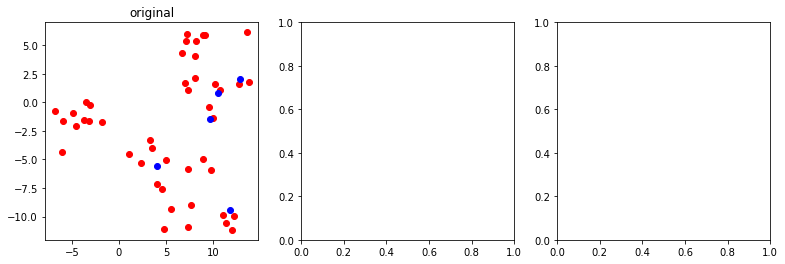

In [28]:
# 원본그림
fig, axes = plt.subplots(1, 3, figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1], c='r')
axes[0].scatter(X_test[:,0], X_test[:,1], c='b')
axes[0].set_title("original")
plt.show()

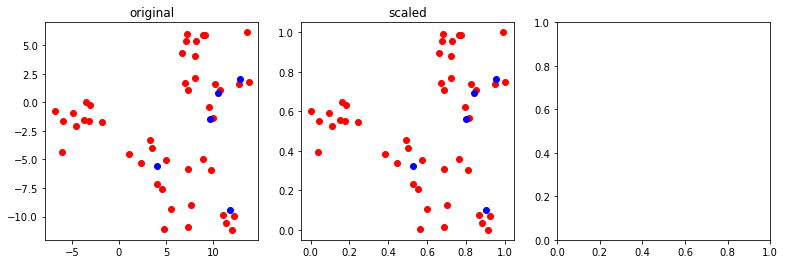

In [31]:
# 스케일(재조정)된 데이터
fig, axes = plt.subplots(1, 3, figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1], c='r')
axes[0].scatter(X_test[:,0], X_test[:,1], c='b')
axes[0].set_title("original")

scaler = MinMaxScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

axes[1].scatter(X_train_s[:,0], X_train_s[:,1], c='r')
axes[1].scatter(X_test_s[:,0], X_test_s[:,1], c='b')
axes[1].set_title("scaled")
plt.show()
# 50개의 점의 위치는 유지되는데 범위가 바뀜

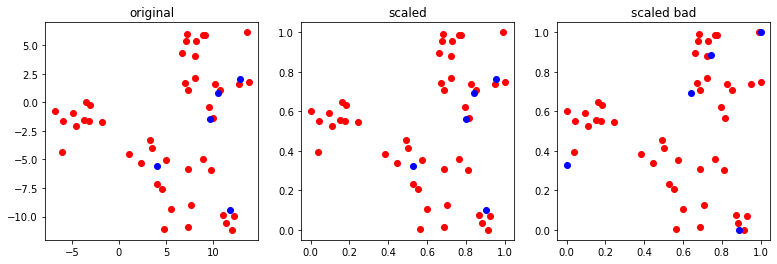

In [32]:
# 스케일(재조정)된 데이터와 잘못된 데이터 분포
fig, axes = plt.subplots(1, 3, figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1], c='r')
axes[0].scatter(X_test[:,0], X_test[:,1], c='b')
axes[0].set_title("original")

scaler = MinMaxScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

axes[1].scatter(X_train_s[:,0], X_train_s[:,1], c='r')
axes[1].scatter(X_test_s[:,0], X_test_s[:,1], c='b')
axes[1].set_title("scaled")

scaler = MinMaxScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

axes[2].scatter(X_train_s[:,0], X_train_s[:,1], c='r')
axes[2].scatter(X_test_s[:,0], X_test_s[:,1], c='b')
axes[2].set_title("scaled bad")
# 테스트에 대한 fitting을 다시했다. -> 하나만 스켈링을 해야한다.
plt.show()

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
from sklearn.svm import SVC
svm = SVC(gamma='auto').fit(X_train, y_train)
svm.score(X_test, y_test)

0.6293706293706294

In [36]:
# data scaling(MinMaxScaler)
scaler = MinMaxScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

svm = SVC(gamma='auto').fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.951048951048951

In [38]:
# data scaling(StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

svm = SVC(gamma='auto').fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.965034965034965

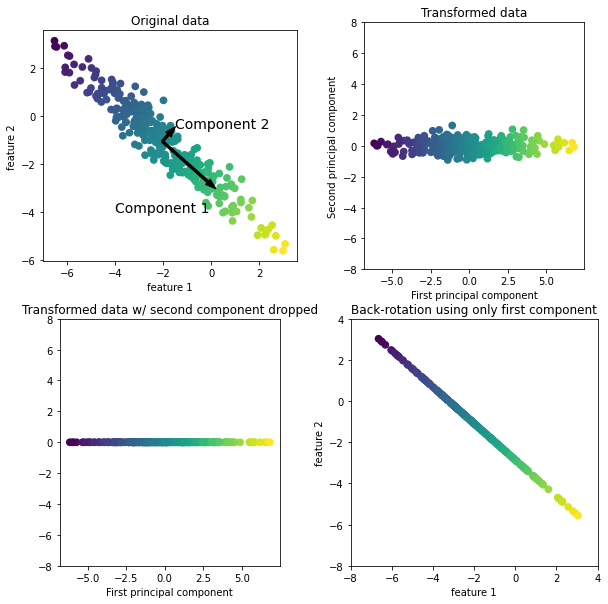

In [39]:
# 주성분분석(PCA)
# 원본데이터
import mglearn
mglearn.plots.plot_pca_illustration()

In [41]:
from sklearn.decomposition import PCA # 불필요한 성분을 빼고 주성분만 남긴다
pca = PCA(n_components=2) # 랜덤인 30개의 항목 중 2개의 성분만
pca.fit(X_train_s)
X_train_pca = pca.transform(X_train_s)

In [43]:
print(X_train_s.shape, X_train_pca.shape)

(426, 30) (426, 2)


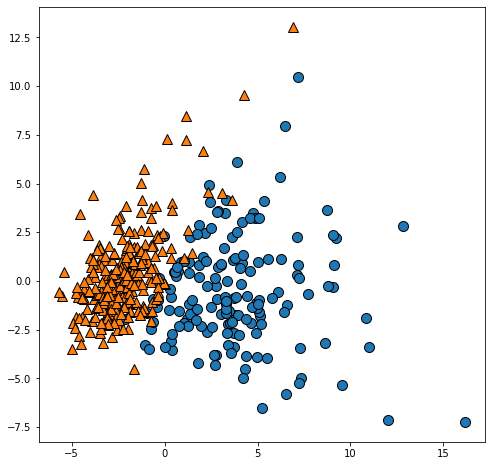

In [44]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1], y_train)


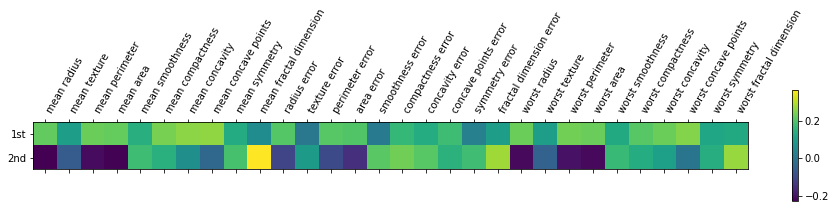

In [46]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['1st','2nd'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names,rotation=60, ha='left')
plt.show()

In [47]:
from sklearn.datasets import fetch_lfw_people

In [48]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) # 적어도 한사람당 20장씩

In [49]:
people.images.shape

(3023, 87, 65)

In [51]:
image_shape = people.images[0].shape
image_shape

(87, 65)

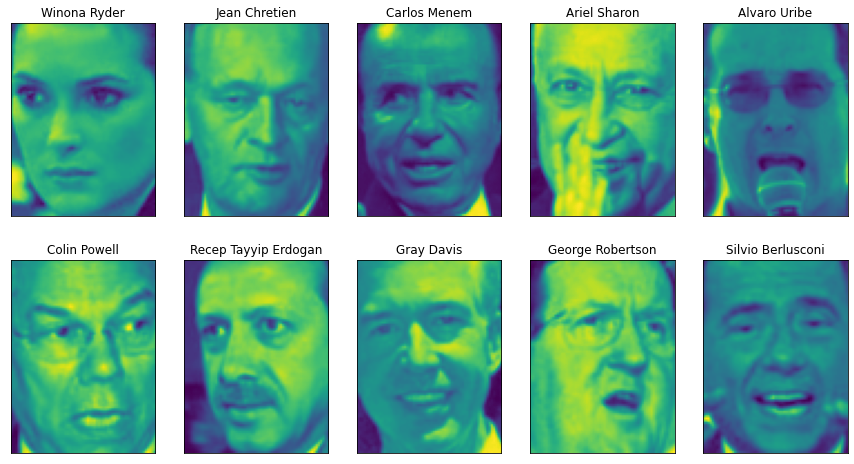

In [53]:
fig, axes = plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [54]:
# 사람 이름의 길이
people.target_names.shape

(62,)

In [56]:
import numpy as np
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='  ')
    if (i+1)%3==0: print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [58]:
people.target.shape

(3023,)

In [59]:
mask = np.zeros(people.target.shape, dtype=np.bool)
mask

<ipython-input-59-a3de969a728b>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


array([False, False, False, ..., False, False, False])

In [62]:
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]=1
X_people = people.data[mask]
y_people = people.target[mask]

In [63]:
X_people.shape

(2063, 5655)

In [71]:
X_people /=255

In [72]:
# 0~1로 정규화
print(X_people[0].min(),X_people[0].max())
print(X_people[1].min(),X_people[1].max())
print(X_people[2].min(),X_people[2].max())

7.036007e-07 1.47756145e-05
8.041151e-08 1.453438e-05
2.8144026e-07 1.5278187e-05


In [75]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify= y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.23255813953488372

In [76]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.2131782945736434

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.2189922480620155

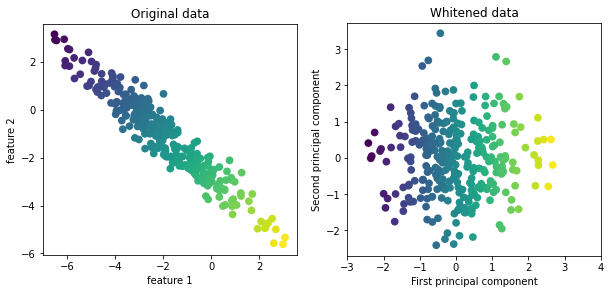

In [78]:
mglearn.plots.plot_pca_whitening()

In [81]:
X_train.shape

(1547, 5655)

In [84]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(1547, 100)

In [85]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
knn.score(X_test_pca, y_test)

0.312015503875969